# Kinetic Models in MEWpy

Author: Vitor Pereira. 

License: [CC BY-SA 4.0](http://creativecommons.org/licenses/by-sa/4.0/)

-------

In this tutorial:

- You will learn how you may use MEWpy to simulate and run optimization on SBML kinetic models.


## Checking and setting the ODE solver

MEWpy allows using distinct ODE solvers (presently  MEWpy offers interfaces for **scipy**, **scikits-ode** and **odespy**). 

For stiff equations please consider installing [scikits.ode](https://scikits-odes.readthedocs.io/en/latest/) and [Sundials](https://computing.llnl.gov/projects/sundials).

You may want to start by checking the ODE solvers available in the system:

In [1]:
from mewpy.solvers import ode_solvers, set_default_ode_solver, get_default_ode_solver

In [2]:
ode_solvers()

['scikits', 'scipy']

If more than one solver is present, you may check the one used by default:

In [3]:
get_default_ode_solver()

'scikits'

And change it if needed

In [4]:
# set_default_ode_solver('scipy')

## Loading and browsing an SBML model


Start by loading the SBML kinetic model:

In [5]:
from mewpy.io.sbml import load_ODEModel
model = load_ODEModel('models/kinetic/chassagnole2002.xml')

The SBML file is loaded into an ODEModel instance that you may use to run distinct tasks. 

Let us start by listing the metabolites and their default initial concentrations:

In [6]:
model.find_metabolites()

,name,compartment,formula,charge,y0
id,,,,,
cpep,Phosphoenol pyruvate,cytosol,,,2.670
cglcex,Extracellular Glucose,extracellular,,,2.000
cg6p,Glucose-6-Phosphate,cytosol,,,3.480
cpyr,Pyruvate,cytosol,,,2.670
cf6p,Fructose-6-Phosphate,cytosol,,,0.600
cg1p,Glucose-1-Phosphate,cytosol,,,0.653
cpg,6-Phosphogluconate,cytosol,,,0.808
cfdp,"Fructose-1,6-bisphosphate",cytosol,,,0.272
csed7p,sedoheptulose-7-phosphate,cytosol,,,0.276


and the reactions:

In [7]:
model.find()

,name,stoichiometry,law,reversible,parameters,modifiers
id,,,,,,
vPTS,Phosphotransferase system,"{'cglcex': -1.0, 'cpep': -1.0, 'cg6p': 1.0, 'c...",extracellular * rmaxPTS * cglcex * (cpep / cpy...,False,"{'rmaxPTS': 7829.78, 'KPTSa1': 3082.3, 'KPTSa2...",[]
vPGI,Glucose-6-phosphate isomerase,"{'cg6p': -1.0, 'cf6p': 1.0}",cytosol * rmaxPGI * (cg6p - cf6p / KPGIeq) / (...,True,"{'rmaxPGI': 650.9878687, 'KPGIeq': 0.1725, 'KP...",[cpg]
vPGM,Phosphoglucomutase,"{'cg6p': -1.0, 'cg1p': 1.0}",cytosol * rmaxPGM * (cg6p - cg1p / KPGMeq) / (...,True,"{'rmaxPGM': 0.8398242773, 'KPGMeq': 0.196, 'KP...",[]
vG6PDH,Glucose-6-phosphate dehydrogenase,"{'cg6p': -1.0, 'cpg': 1.0}",cytosol * rmaxG6PDH * cg6p * cnadp / ((cg6p + ...,False,"{'rmaxG6PDH': 1.380196955, 'KG6PDHg6p': 14.4, ...",[]
vPFK,Phosphofructokinase,"{'cf6p': -1.0, 'cfdp': 1.0}",cytosol * rmaxPFK * catp * cf6p / ((catp + KPF...,False,"{'rmaxPFK': 1840.584747, 'KPFKatps': 0.123, 'K...",[cpep]
vTA,Transaldolase,"{'cgap': -1.0, 'csed7p': -1.0, 'cf6p': 1.0, 'c...",cytosol * rmaxTA * (cgap * csed7p - ce4p * cf6...,True,"{'rmaxTA': 10.87164108, 'KTAeq': 1.05}",[]
vTKA,Transketolase a,"{'crib5p': -1.0, 'cxyl5p': -1.0, 'cgap': 1.0, ...",cytosol * rmaxTKa * (crib5p * cxyl5p - csed7p ...,True,"{'rmaxTKa': 9.473384783, 'KTKaeq': 1.2}",[]
vTKB,Transketolase b,"{'ce4p': -1.0, 'cxyl5p': -1.0, 'cgap': 1.0, 'c...",cytosol * rmaxTKb * (cxyl5p * ce4p - cf6p * cg...,True,"{'rmaxTKb': 86.55855855, 'KTKbeq': 10.0}",[]
vMURSyNTH,Mureine synthesis,{'cf6p': -2.0},cytosol * rmaxMurSynth,False,{'rmaxMurSynth': 0.00043711},[]


You may filter the list of reactions by a name pattern:

In [8]:
model.find('vPTS')

,name,stoichiometry,law,reversible,parameters,modifiers
id,,,,,,
vPTS,Phosphotransferase system,"{'cglcex': -1.0, 'cpep': -1.0, 'cg6p': 1.0, 'c...",extracellular * rmaxPTS * cglcex * (cpep / cpy...,False,"{'rmaxPTS': 7829.78, 'KPTSa1': 3082.3, 'KPTSa2...",[]


The same is true for parameters in the model:

In [9]:
model.find_parameters('rmax')

,Value
Parameter,
rmaxPTS,7829.780000
rmaxPGI,650.987869
rmaxPGM,0.839824
rmaxG6PDH,1.380197
rmaxPFK,1840.584747
rmaxTA,10.871641
rmaxTKa,9.473385
rmaxTKb,86.558559
rmaxMurSynth,0.000437


### Model Reactions

You may access each reaction programmatically:

In [10]:
model.reactions.vPTS

((((extracellular*7829.78)*cglcex)*(cpep/cpyr))/((((3082.3+(0.01*(cpep/cpyr)))+(245.3*cglcex))+(cglcex*(cpep/cpyr)))*(1+(pow(cg6p,3.66)/2.15))))

List the substrate and product metabolites:

In [11]:
model.reactions.vPTS.substrates

['cglcex', 'cpep']

In [12]:
model.reactions.vPTS.products

['cg6p', 'cpyr']

as well as the parameters and their default values:

In [13]:
model.reactions.vPTS.parameters

OrderedDict([('rmaxPTS', 7829.78),
             ('KPTSa1', 3082.3),
             ('KPTSa2', 0.01),
             ('KPTSa3', 245.3),
             ('nPTSg6p', 3.66),
             ('KPTSg6p', 2.15)])

You may rename parameters if needed, for example if you decide to add a reaction to the model and avoid conflicting naming. The renaming is persistent.

In [14]:
model.reactions.vPTS.rename_parameter('rmaxPTS','rmaxPTS_renamed')
model.reactions.vPTS

((((extracellular*7829.78)*cglcex)*(cpep/cpyr))/((((3082.3+(0.01*(cpep/cpyr)))+(245.3*cglcex))+(cglcex*(cpep/cpyr)))*(1+(pow(cg6p,3.66)/2.15))))

Print the rate law with values defined in the kinetic reaction:

In [15]:
model.reactions.vPTS.replace()

'((((extracellular * 7829.78) * cglcex) * (cpep / cpyr)) / ((((3082.3 + (0.01 * (cpep / cpyr))) + (245.3 * cglcex)) + (cglcex * (cpep / cpyr))) * (1 + (pow(cg6p , 3.66) / 2.15))))'

You may want to use latex for ease of reading:

In [16]:
model.reactions.vPTS.replace(latex=True)

\frac {\textrm{extracellular} \times 7829.78 \times \textrm{cglcex} \times \frac {\textrm{cpep}} {\textrm{cpyr}}} {\mathopen{}\left( 3082.3 + 0.01 \times \frac {\textrm{cpep}} {\textrm{cpyr}} + 245.3 \times \textrm{cglcex} + \textrm{cglcex} \times \frac {\textrm{cpep}} {\textrm{cpyr}} \mathclose{}\right) \times \mathopen{}\left( \textrm{1} + \frac {{\textrm{cg6p}}^{3.66}} {2.15} \mathclose{}\right)}

MEWpy also allows for computing the reaction rate with the default values or using alternative parameters and/or metabolites concentration values. 

Computes the reaction rate with the default parameters and concentrations:

In [17]:
model.reactions.vPTS.calculate_rate()

6.238284215661543

or passing substrates concentrations and/or parameter values

In [18]:
model.reactions.vPTS.calculate_rate(parameters={'extracellular':70},substrates={'cg6p':5})

1.8123670461913133

# Kinetic Simulations

To run kinetic simulations you need to instantiate a KineticSimulation object:

In [19]:
from mewpy.simulation.kinetic import KineticSimulation

In [20]:
sim = KineticSimulation(model,timeout=0) 

You may define options for all simulations
- *parameters*, a dictionary of parameter values whom default values you want to replace;
- *t_points*, the integration time points `[1,2,3,4,5]` or time span (a list of two values `[start,end]`);
- *timeout*, the solver timeout in seconds. If `timeout=0`, no timeout is applied.

When a time span is defined, it is divided into n time steps.
The number of time steps is configurable: 

In [21]:
from mewpy.solvers import SolverConfigurations

SolverConfigurations.N_STEPS

20

In [22]:
SolverConfigurations.N_STEPS = 30
SolverConfigurations.N_STEPS

30

You may also specify the *t_points* for all simulations, in the example a time span between 0 and 600 will be splitted evenly in 20 time points:

In [23]:
sim.set_time(0,600,20)
sim.get_time_points()

array([  0.        ,  31.57894737,  63.15789474,  94.73684211,
       126.31578947, 157.89473684, 189.47368421, 221.05263158,
       252.63157895, 284.21052632, 315.78947368, 347.36842105,
       378.94736842, 410.52631579, 442.10526316, 473.68421053,
       505.26315789, 536.84210526, 568.42105263, 600.        ])

Time points may be set only for a particular simulation:

In [24]:
res = sim.simulate(t_points=range(0,800,50))

List the **steady-state** values

In [25]:
res.find()

,Flux rate
Reaction ID,
vPTS,2.004969e-01
vPGI,5.832543e-02
vPGM,2.364146e-03
vG6PDH,1.397891e-01
vPFK,1.414149e-01
vTA,4.548648e-02
vTKA,4.549291e-02
vTKB,3.848041e-02
vMURSyNTH,4.371100e-04


Getting or viewing individual fluxes by id or pattern

In [26]:
print(res.fluxes['vPTS'])
# or
res.find('vPTS')

0.20049693776702313


,Flux rate
Reaction ID,
vPTS,0.200497


You may plot the changes on metabolite concentrations over time for one or more metabolites:

<AxesSubplot:xlabel='Time', ylabel='Glyceraldehyde-3-Phosphate'>

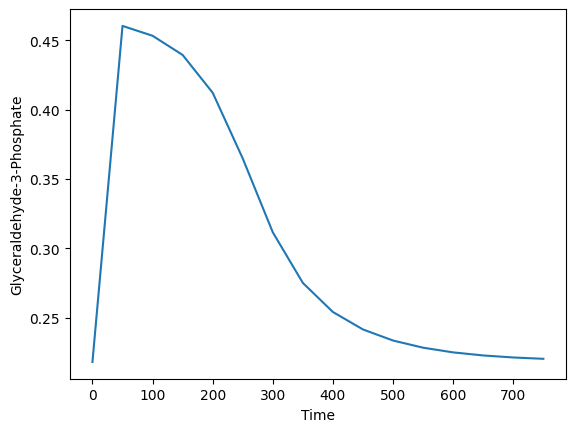

In [27]:
res.plot('cgap')

<AxesSubplot:xlabel='Time', ylabel='Extracellular Glucose'>

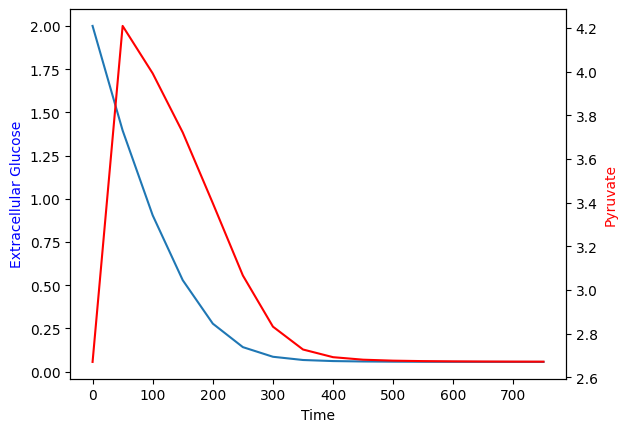

In [28]:
res.plot(['cglcex','cpyr'])

<AxesSubplot:xlabel='Time', ylabel='Concentrations'>

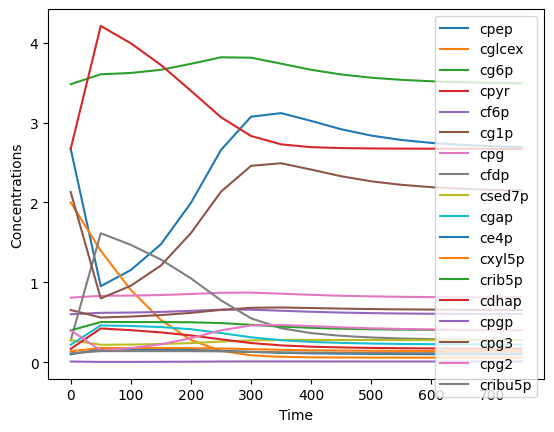

In [29]:
res.plot()

You may retrieve the time point concentrations:

In [30]:
res.get_y('cglcex')

array([2.        , 1.39495993, 0.90403506, 0.52864979, 0.27730819,
       0.14145998, 0.08569682, 0.0670109 , 0.06083137, 0.05845301,
       0.05733298, 0.05671848, 0.05635113, 0.05612171, 0.05597545,
       0.055881  ])

Instead of a list you may want to build a dataframe, that you may save to an excel or cvs file:

In [31]:
import pandas as pd
pd.DataFrame(res.get_y('cglcex'),columns=['Concentration'],index=res.t)

,Concentration
0.0,2.000000
50.0,1.394960
100.0,0.904035
150.0,0.528650
200.0,0.277308
250.0,0.141460
300.0,0.085697
350.0,0.067011
400.0,0.060831
450.0,0.058453


### Modifiying initial concentrations and parameters

When running a simulation you may also define:
- *initcon*, a dictionary of initial concentrations (partial or for all metabolites);
- *parameters*, a dictionary of parameters to be used in the simulation;
- *factors*, a dictionary of factores to be applied to parameters. 

Some examples are next provided:

- Change initial concentrations

In [32]:
model.find_metabolites('cglcex')

,name,compartment,formula,charge,y0
id,,,,,
cglcex,Extracellular Glucose,extracellular,,,2.0


<AxesSubplot:xlabel='Time', ylabel='Concentrations'>

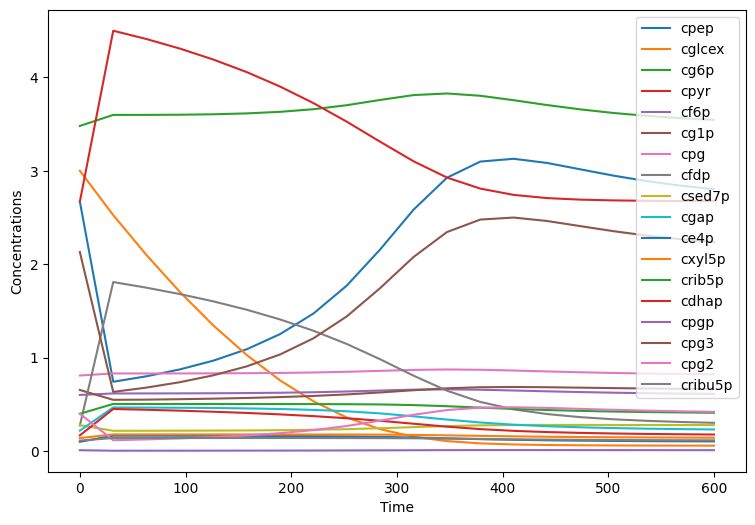

In [33]:
initcon = {'cglcex':3.0}
res = sim.simulate(initcon=initcon)
res.plot(size=(9,6))

Modify a parameter setting a new **temporary** value:

In [34]:
model.find_parameters('rmaxPK')

,Value
Parameter,
rmaxPK,0.061132


<AxesSubplot:xlabel='Time', ylabel='Concentrations'>

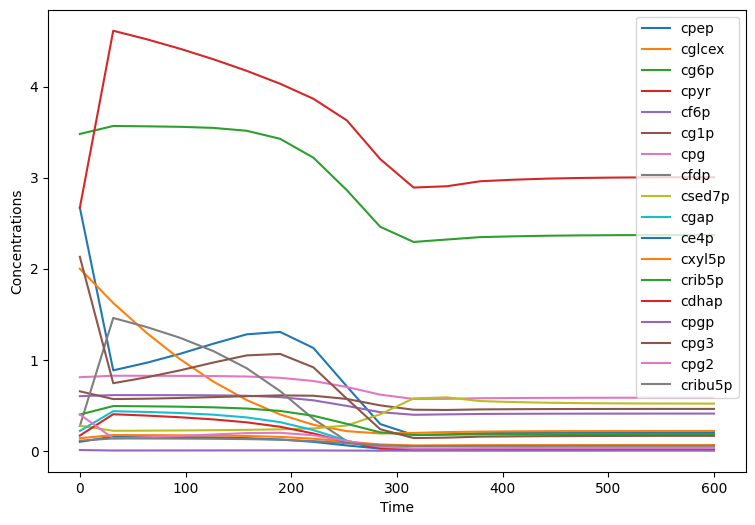

In [35]:
parameters = {'rmaxPK':0.61132}
res = sim.simulate(parameters=parameters)
res.plot(size=(9,6))

You may also apply a factor to a parameter:

_(Note that if you define a new value to a parameter and apply a factor to it, both modifications will be applied.)_

<AxesSubplot:xlabel='Time', ylabel='Concentrations'>

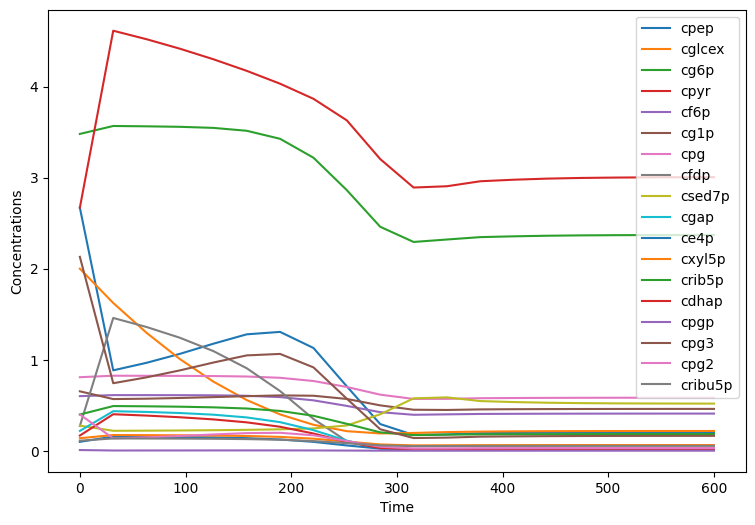

In [36]:
factors = {'rmaxPK':10} # meaning 10 folds 
res = sim.simulate(factors=factors)
res.plot(size=(9,6))

## Strain Design Optimization with SBML kinetic models

In [37]:
from mewpy.problems import KineticOUProblem
from mewpy.optimization.evaluation import TargetFlux, ModificationType
from mewpy.optimization import EA
import warnings

The rational behind the optimization is that Vmax parameters are a proxy for an enzyme concentrations times its turnover. When substrates are in "sufficient" concentration, changing Vmaxs values will translante into changing enzymes availability. By default the Vmax values are considered as modifications target, you might change this setting and provide a chosen list of targets.

We start by defining the optimization objective(s). As a rule of thumb, consider no more than 3 or 4 objective. If more objectives are required, you may consider an aggregated sum of some (see MEWpy documentation). 

In [38]:
objectives = [TargetFlux('vsersynth')]

We next define the allows fold levels to be applied to the targets:

In [39]:
import numpy as np
levels = [round(x,1) for x in np.arange(0, 3, 0.2)]
levels

[0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8]

We can now define the optimization problem:

In [40]:
problem = KineticOUProblem(model, objectives, t_points=[0, 100], timeout=0, levels=levels)

and instantiate an optimization engine to run for 20 iterations:

In [41]:
ea = EA(problem,max_generations=20)

To run the optimization, just call the run method:

In [42]:
population = ea.run()

Running GA



[CVODE ERROR]  CVode
  At t = 3.09224, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 4.63919, the right-hand side routine failed in an unrecoverable manner.


[CVODE ERROR]  CVode
  At t = 5.3245, the right-hand side routine failed in an unrecoverable manner.


[CVODE ERROR]  CVode
  At t = 4.79242, the right-hand side routine failed in an unrecoverable manner.


[CVODE ERROR]  CVode
  At t = 4.64334, the right-hand side routine failed in an unrecoverable manner.



Evaluations: 100	Fitness: 0.012582365820303509
Evaluations: 200	Fitness: 0.0328191185597368



[CVODE ERROR]  CVode
  At t = 5.03085, the right-hand side routine failed in an unrecoverable manner.



Evaluations: 300	Fitness: 0.03811978053331872
Evaluations: 400	Fitness: 0.04856276220682675
Evaluations: 500	Fitness: 0.04856276220682675
Evaluations: 600	Fitness: 0.050869305341854756
Evaluations: 700	Fitness: 0.055359880124647994
Evaluations: 800	Fitness: 0.055359880124647994



[CVODE ERROR]  CVode
  At t = 8.57982, the right-hand side routine failed in an unrecoverable manner.



Evaluations: 900	Fitness: 0.055359880124647994
Evaluations: 1000	Fitness: 0.0554429740004523



[CVODE ERROR]  CVode
  At t = 4.22832, the right-hand side routine failed in an unrecoverable manner.



Evaluations: 1100	Fitness: 0.05811270945492204
Evaluations: 1200	Fitness: 0.0588543052807965
Evaluations: 1300	Fitness: 0.05890538092953184



[CVODE ERROR]  CVode
  At t = 7.3276, the right-hand side routine failed in an unrecoverable manner.


[CVODE ERROR]  CVode
  At t = 9.35153, the right-hand side routine failed in an unrecoverable manner.


[CVODE ERROR]  CVode
  At t = 7.11314, the right-hand side routine failed in an unrecoverable manner.



Evaluations: 1400	Fitness: 0.059017827406469124
Evaluations: 1500	Fitness: 0.059098802786308226



[CVODE ERROR]  CVode
  At t = 8.05244, the right-hand side routine failed in an unrecoverable manner.



Evaluations: 1600	Fitness: 0.059460934584215946
Evaluations: 1700	Fitness: 0.059460934584215946
Evaluations: 1800	Fitness: 0.0596183047636292
Evaluations: 1900	Fitness: 0.05966963832957868
Evaluations: 2000	Fitness: 0.06167213660100724


When the optimization finishes, you may want to convert the optimization results to a dataframe, and save them if it is the case.

In [43]:
df = ea.dataframe()
df

,Modification,Size,TargetFlux
0,"{'rmaxPTS_renamed': 0.2, 'rmaxPK': 0.2, 'rmaxS...",6,0.061672
1,"{'rmaxPTS_renamed': 0.2, 'rmaxPK': 0.2, 'rmaxG...",6,0.059670
2,"{'rmaxPTS_renamed': 0.2, 'rmaxPK': 0.2, 'rmaxG...",6,0.059637
3,"{'rmaxPTS_renamed': 0.2, 'rmaxPK': 0.2, 'rmaxG...",7,0.059631
4,"{'rmaxPTS_renamed': 0.2, 'rmaxMetSynth': 1.8, ...",6,0.059618
5,"{'rmaxPTS_renamed': 0.2, 'rmaxTIS': 1.4, 'rmax...",6,0.059607
6,"{'rmaxPTS_renamed': 0.2, 'rmaxPK': 0.2, 'rmaxG...",7,0.059530
7,"{'rmaxPTS_renamed': 0.2, 'rmaxR5PI': 2.2, 'rma...",5,0.059507
8,"{'rmaxPTS_renamed': 0.2, 'rmaxPK': 0.2, 'rmaxS...",6,0.059473
9,"{'rmaxPTS_renamed': 0.2, 'rmaxPK': 0.2, 'rmaxS...",6,0.059468


You can additionaly select a solution and analyse it further, for example, by simulating it and ploting the results:

{'rmaxPTS_renamed': 0.2, 'rmaxPK': 0.2, 'rmaxSerSynth': 2.8, 'rmaxGAPDH': 2.8, 'rmaxR5PI': 1.4, 'rmaxpepCxylase': 0.0}


<AxesSubplot:xlabel='Time', ylabel='Concentrations'>

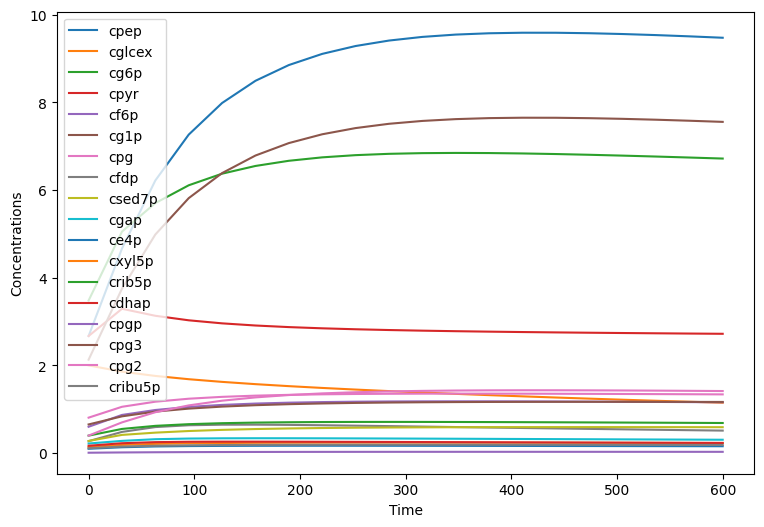

In [44]:
solution = df['Modification'][0]
print(solution)
sim.simulate(factors=solution).plot()